In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tqdm import tqdm
from tensorflow import keras
import matplotlib.image as image
from matplotlib import pyplot
from random import randint
from sklearn.utils import shuffle

In [ ]:
BASE_DIR='/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset'
B_PATH = '/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset/Bengin cases'
M_PATH = '/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset/Malignant cases'
N_PATH = '/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset/Normal cases'

In [ ]:
l1 = ['Bengin cases','Malignant cases' , 'Normal cases']

In [ ]:
num_class = {'b_1': len(os.listdir(B_PATH)),
             'm_2': len(os.listdir(M_PATH)),
             'n_3': len(os.listdir(N_PATH))}

In [ ]:
#Encoding the classes
class_map = {
    'Bengin cases': 1,
    'Malignant cases': 2,
    'Normal cases': 3,
}
in_class_map = {
    1:'Bengin cases',
    2:'Malignant cases',
    3: 'Normal cases',
}

####Checking the imbalance of dataset

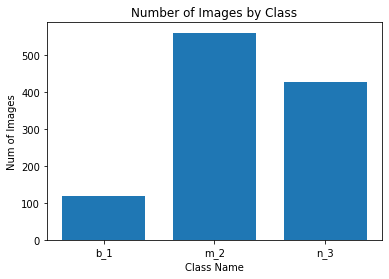

In [ ]:
plt.bar(num_class.keys(), num_class.values(), width = 0.75);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('Num of Images');

#####View Sample Images

In [ ]:
def load_data():
    output = []
    images = []
    labels = []

    for l in l1:
      folderPath = os.path.join(BASE_DIR, l)
      for image_file in tqdm(os.listdir(folderPath)):
        # print(image_file)
        image = cv2.imread(os.path.join(folderPath, image_file))
        image = cv2.resize(image,(150,150))
        images.append(image)
        labels.append(class_map[l])
    return images,labels


In [ ]:
images,labels=load_data()

100%|██████████| 427/427 [00:09<00:00, 43.61it/s]


In [ ]:
images, labels = shuffle(images, labels, random_state=25)

In [ ]:
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]-1])
    plt.show()

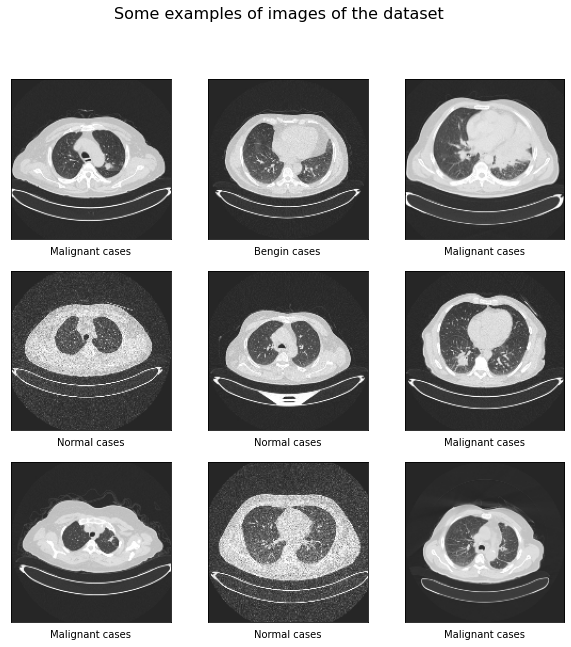

In [ ]:
display_examples(l1, images, labels)

In [ ]:
counts = np.unique(labels, return_counts=True)

In [ ]:
print(counts[1])

[120 561 427]


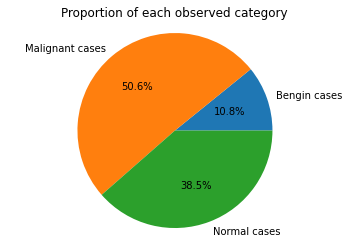

In [ ]:
plt.pie(counts[1],
        explode=(0, 0, 0) ,
        labels=l1,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()